# Visualizing the mouse behavior

In [2]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

In [3]:
data = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/all_9010_high_processed2.csv',index_col=0)

In [4]:
data.tail(10)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward
515,SOM45,07242017_SOM45,526,59,37,12,1,0,1,8.688,...,0,1,1.248,0.530,4.897,0.517,1,1,0,0
516,SOM45,07242017_SOM45,527,60,37,1,-1,0,1,2.506,...,1,0,4.897,0.517,2.221,0.495,0,1,1,1
517,SOM45,07242017_SOM45,528,61,38,1,1,0,1,5.952,...,0,1,2.221,0.495,2.461,0.489,0,0,1,1
518,SOM45,07242017_SOM45,529,62,39,2,2,0,1,3.124,...,0,1,2.461,0.489,2.956,0.481,0,0,1,1
519,SOM45,07242017_SOM45,530,63,40,3,3,0,1,2.384,...,0,1,2.956,0.481,1.460,0.481,0,0,1,1
520,SOM45,07242017_SOM45,531,64,41,4,4,0,0,2.264,...,0,1,1.460,0.481,2.446,0.508,0,0,1,1
521,SOM45,07242017_SOM45,532,65,42,5,5,0,1,2.443,...,0,1,2.446,0.508,1.980,0.524,0,0,1,0
522,SOM45,07242017_SOM45,533,66,42,6,-1,0,1,2.414,...,0,0,1.980,0.524,1.410,0.479,0,0,1,1
523,SOM45,07242017_SOM45,534,67,43,7,1,0,0,2.291,...,0,1,1.410,0.479,33.364,0.592,0,0,1,1
524,SOM45,07242017_SOM45,535,68,44,8,2,0,1,1.248,...,0,1,33.364,0.592,1.721,0.432,0,0,1,1


In [39]:
data.shape


(36320, 53)

In [40]:
np.unique(data['Reward Streak'])

array([-18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,
        -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.])

In [6]:
data['0_trialDuration'].mean()

0.45495925110132157

In [42]:
data[data['Reward Streak'] == -1]['Switch'].mean()

0.23165760869565216

## separate back into individual mice for mouse to mouse comparison

In [43]:
np.unique(data['Mouse ID'])

array(['PV30', 'SOM41', 'SOM42', 'SOM44', 'SOM45'], dtype=object)

In [44]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_PV30 = data[data['Mouse ID'] == 'PV30']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']
datas = []

for s in np.unique(data['Session ID'].values):
    datas.append(data_PV30[data_PV30['Session ID'] == s])
    datas.append(data_SOM42[data_SOM42['Session ID'] == s])
    datas.append(data_SOM41[data_SOM41['Session ID'] == s])
    datas.append(data_SOM44[data_SOM44['Session ID'] == s])
    datas.append(data_SOM45[data_SOM45['Session ID'] == s])

In [45]:
data_PV30.shape, data_SOM42.shape, data_SOM41.shape, data_SOM44.shape, data_SOM45.shape

((5065, 53), (12407, 53), (6151, 53), (4243, 53), (8454, 53))

# p(switch) | switched in ith previous trial

In [46]:
p_switch = np.zeros(20)
for i in np.arange(0,20):
    p_switch[i] = data.iloc[np.where(data['Switch'].values == 1)[0]-i]['Switch'].mean(axis=0)

In [47]:
p_switchy = np.zeros((len(datas),20))

for s,d in enumerate(datas):
    for i in np.arange(0,20):
        p_switchy[s,i] = d.iloc[np.where(d['Switch'].values == 1)[0]-i]['Switch'].mean(axis=0)

In [48]:
errors = p_switchy.std(axis=0) / np.sqrt(len(p_switchy))

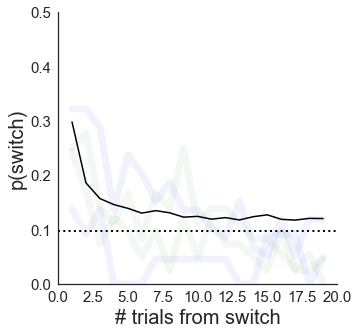

In [49]:
sns.set_style('white')
plt.figure(figsize=(5,5))
for s in range(20):
    if (s%2 == 0):
        plt.plot(np.arange(1,20),p_switchy[s,1:],alpha=0.05,linewidth=7,color='blue')
    else:
        plt.plot(np.arange(1,20),p_switchy[s,1:],alpha=0.05,linewidth=7,color='green')
        
plt.hlines(y=data['Switch'].mean(axis=0),xmin=0,xmax=20,color='black',alpha=1,linewidth=2,linestyles='dotted',label='average')
plt.plot(np.arange(1,20),p_switch[1:],color='black',linewidth=1.5)
plt.fill_between(np.arange(1,20),p_switch[1:]+errors[1:],p_switch[1:]-errors[1:],color='grey')
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.xlabel('# trials from switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine()

# Looking more closely at the switch trials

In [50]:
switches = data['Switch'].values

In [51]:
streak = np.array([3,2,1,-1,-2,-3,-4,-5,-6,-7,-8])
port_streaks = np.arange(0,6)
p_switch_a = np.zeros_like(streak)*0.0
p_switch_b = np.zeros_like(streak)*0.0

for i,s in enumerate(streak): 
        p_switch_a[i] = data[(data['Port Streak'] >= 5) & (data['Reward Streak'] == s)]['Switch'].mean()
        p_switch_b[i] = data[(data['Port Streak'] < 5) & (data['Reward Streak'] == s)]['Switch'].mean()

In [52]:
streak = np.array([3,2,1,-1,-2,-3,-4,-5,-6,-7,-8])
port_streaks = np.arange(0,6)
p_switch_indi_a = np.zeros((len(datas),streak.shape[0]))
p_switch_indi_b = np.zeros_like(p_switch_indi_a)

for j,d in enumerate(datas):
    for i,s in enumerate(streak): 
            p_switch_indi_a[j,i] = d[(d['Port Streak'] >= 5) & (d['Reward Streak'] == s)]['Switch'].mean()
            p_switch_indi_b[j,i] = d[(d['Port Streak'] < 5) & (d['Reward Streak'] == s)]['Switch'].mean()

In [53]:
errors_a = np.nanstd(p_switch_indi_a,axis=0) / np.sqrt(p_switch_indi_a.shape[0])
errors_b = np.nanstd(p_switch_indi_b,axis=0) / np.sqrt(p_switch_indi_a.shape[0])

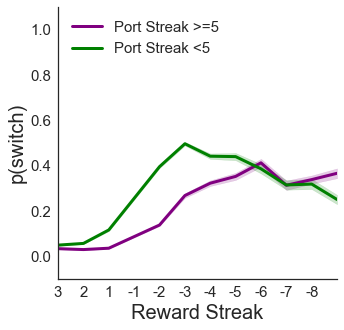

In [55]:
plt.figure(figsize=(5,5))
#plt.vlines(x=0,ymin=0,ymax=1,color='white',linewidth=60,zorder=3)
plt.plot(streak,p_switch_a,label='Port Streak >=5',linewidth=3,zorder=1,color='purple')
plt.fill_between(streak,p_switch_a+errors_a,p_switch_a-errors_a,color='purple',alpha=0.2)
plt.plot(streak,p_switch_b,label='Port Streak <5',linewidth=3,zorder=2,color='green')
plt.fill_between(streak,p_switch_b+errors_b,p_switch_b-errors_b,color='green',alpha=0.2)
plt.xticks(np.arange(3,-8,-1),streak,fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(3,-8)
plt.ylim(-0.1,1.1)
plt.legend(loc='upper left',fontsize=15)
sns.despine()
plt.ylabel('p(switch)',fontsize=20)
plt.xlabel('Reward Streak',fontsize=20)

# Switches when 1_Reward = 0

(0, 0.5)

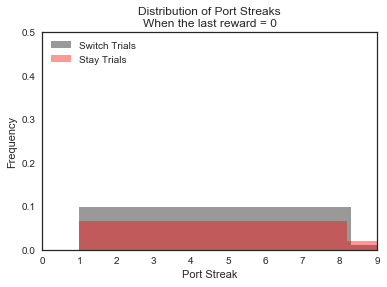

In [50]:
plt.hist(data[(data['1_Reward'] == 0) & (data['Switch'] == 1)]['Port Streak'],color='black',alpha=0.4,normed=True,label='Switch Trials')
plt.hist(data[(data['1_Reward'] == 0) & (data['Switch'] == 0)]['Port Streak'],color='red',alpha=0.4,normed=True,label='Stay Trials')
plt.title('Distribution of Port Streaks\nWhen the last reward = 0')
plt.ylabel('Frequency')
plt.xlabel('Port Streak')
plt.legend(loc='upper left')
plt.xlim(0,9)
plt.ylim(0,0.5)

(array([  5.46083029e-02,   2.66600388e-02,   1.80830441e-02,
          1.30402884e-02,   9.45815997e-03,   8.20345723e-03,
          5.23431334e-03,   2.96435495e-03,   5.65095128e-04,
          7.18341264e-05]),
 array([  1. ,   8.2,  15.4,  22.6,  29.8,  37. ,  44.2,  51.4,  58.6,
         65.8,  73. ]),
 <a list of 10 Patch objects>)

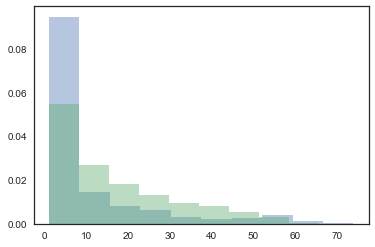

In [52]:
plt.hist(data[data['Switch']==1]['Port Streak'],normed=True,alpha=0.4)
plt.hist(data[data['Switch']==0]['Port Streak'],normed=True,alpha=0.4)

(array([  5.46083029e-02,   2.66600388e-02,   1.80830441e-02,
          1.30402884e-02,   9.45815997e-03,   8.20345723e-03,
          5.23431334e-03,   2.96435495e-03,   5.65095128e-04,
          7.18341264e-05]),
 array([  1. ,   8.2,  15.4,  22.6,  29.8,  37. ,  44.2,  51.4,  58.6,
         65.8,  73. ]),
 <a list of 10 Patch objects>)

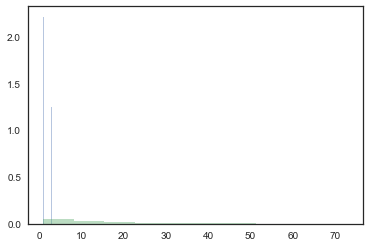

In [53]:
plt.hist(data[data['Port Streak'] <= 3]['Port Streak'],normed=True,alpha=0.4)
plt.hist(data[data['Switch']==0]['Port Streak'],normed=True,alpha=0.4)

In [54]:
data[data['Port Streak'] > 5]['Switch'].mean()

0.056844390177723511

In [55]:
p_switch

array([ 1.        ,  0.30268199,  0.18965517,  0.16123883,  0.15070243,
        0.1408046 ,  0.1302682 ,  0.13537676,  0.13473819,  0.12484036,
        0.12356322,  0.12100894,  0.12228608,  0.12005109,  0.12452107,
        0.12867178,  0.11813538,  0.1155811 ,  0.11909323,  0.1197318 ])

In [56]:
p_switch = np.zeros(10)*0.0
avg = data['Switch'].mean()

for i,s in enumerate(np.arange(1,11)):
    p_switch[i] = data[data['Port Streak'] == s]['Switch'].mean()

p_switches = np.zeros((20,10))*0.0
p_switches_R = np.zeros((20,10))*0.0
p_switches_nR = np.zeros((20,10))*0.0
for j,d in enumerate(datas):
    for i,s in enumerate(np.arange(1,11)):
        p_switches[j,i] = d[d['Port Streak'] == s]['Switch'].mean()
        p_switches_R[j,i] = d[(d['Port Streak'] == s) & (d['1_Reward']==1)]['Switch'].mean()
        p_switches_nR[j,i] = d[(d['Port Streak'] == s) & (d['1_Reward']==0)]['Switch'].mean()

errors = p_switches.std(axis=0) / np.sqrt(p_switches.shape[0])
errors_R = np.nanstd(p_switches_R,axis=0) / np.sqrt(p_switches.shape[0])
errors_nR = np.nanstd(p_switches_nR,axis=0) / np.sqrt(p_switches.shape[0])
p_switch_R = np.nanmean(p_switches_R,axis=0)
p_switch_nR = np.nanmean(p_switches_nR,axis=0)

IndexError: index 20 is out of bounds for axis 0 with size 20

ValueError: operands could not be broadcast together with shapes (10,) (20,) 

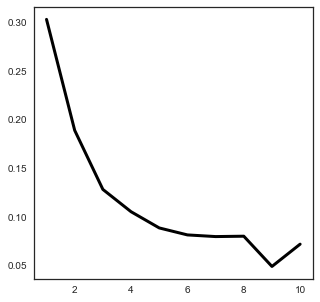

In [57]:
plt.figure(figsize=(5,5))

plt.plot(np.arange(1,11),p_switch,color='black',linewidth=3,label='All Trials')
plt.fill_between(np.arange(1,11),p_switch+errors,p_switch-errors,color='black',alpha=0.5)

plt.plot(np.arange(1,11),p_switch_R,color='green',linewidth=3,label='Previous Trial Rewarded')
plt.fill_between(np.arange(1,11),p_switch_R+errors_R,p_switch_R-errors_R,color='green',alpha=0.5)

plt.plot(np.arange(1,11),p_switch_nR,color='blue',linewidth=3,label='Previous Trial Not Rewarded')
plt.fill_between(np.arange(1,11),p_switch_nR+errors_nR,p_switch_nR-errors_nR,color='blue',alpha=0.5)

plt.hlines(y=avg,xmin=1,xmax=10,linestyle='dotted')
plt.ylim(0,0.7)
plt.ylabel('p(switch)',fontsize=20)
plt.xlabel('# trials since previous switch',fontsize=20)
plt.legend(loc='upper right',fontsize=15)
plt.xticks(np.arange(1,11),[0,1,2,3,4,5,6,7,8,'>8','>9'],fontsize=15)
plt.yticks(fontsize=15)
sns.despine()

In [58]:
c = 0
cs = np.zeros(10)
for j,i in enumerate(np.arange(1,11)):
    c +=  data[data['Port Streak'] == i]['Switch'].sum()/data['Switch'].sum()
    cs[j] = c

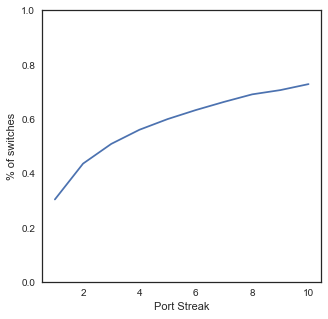

In [59]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),cs)
plt.ylim(0,1)
plt.ylabel('% of switches')
plt.xlabel('Port Streak')

## analysis of block switches

In [56]:
data.shape

(36320, 53)

In [57]:
t_block_unique = np.unique(data['Block Trial'].values)
p_switch_block = np.zeros((t_block_unique.shape[0],2))
high_p_port = np.zeros_like(p_switch_block)
trial_block_count = np.zeros_like(t_block_unique)

for t in t_block_unique:
    p_switch_block[int(t),0] = data[data['Block Trial'] == t]['Switch'].mean(axis=0)
    trial_block_count[int(t)] = data[data['Block Trial'] == t].shape[0]
    p_switch_block[int(t),1] = data[data['Block Trial'] == t]['Switch'].std(axis=0) / np.sqrt(trial_block_count[int(t)])
    
    high_p_port[int(t),0] = data[data['Block Trial']==t]['Higher p port'].mean(axis=0)
    high_p_port[int(t),1] = data[data['Block Trial']==t]['Higher p port'].std(axis=0) / np.sqrt(trial_block_count[int(t)])
    

total # of blocks in dataset: ~534


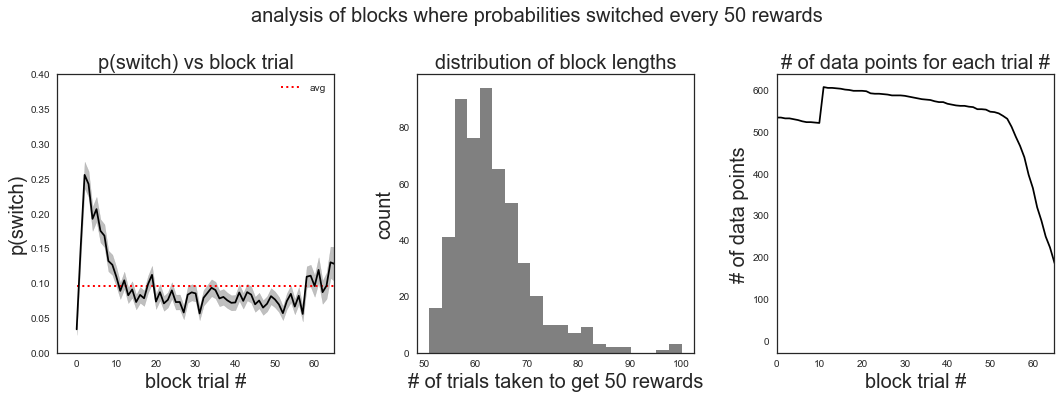

In [58]:
x_end=65
plt.figure(figsize=(15,5))
plt.suptitle('analysis of blocks where probabilities switched every 50 rewards',x=0.5,y=1.1,fontsize=20)

plt.subplot(131)
plt.plot(t_block_unique,p_switch_block[:,0],color='black')
plt.fill_between(t_block_unique,p_switch_block[:,0]+p_switch_block[:,1],p_switch_block[:,0]-p_switch_block[:,1],color='grey',alpha=0.5)
plt.hlines(data['Switch'].mean(axis=0),xmin=0,xmax=x_end,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlim(-5,x_end)
plt.ylim(0,0.4)
plt.xlabel('block trial #',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) vs block trial',fontsize=20)

plt.subplot(132)
plt.hist(data.iloc[np.where(data['Block Trial']==0)[0]-1]['Block Trial'],bins=20,color='grey')
plt.title('distribution of block lengths',fontsize=20)
plt.xlabel('# of trials taken to get 50 rewards',fontsize=20)
plt.ylabel('count',fontsize=20)

plt.subplot(133)
plt.plot(t_block_unique,trial_block_count,color='black')
plt.title('# of data points for each trial #',fontsize=20)
plt.ylabel('# of data points',fontsize=20)
plt.xlabel('block trial #',fontsize=20)
plt.xlim(0,x_end)

plt.tight_layout()
print('total # of blocks in dataset: ~%.0f' % (np.sum(data['Block Trial']==0)))

In [59]:
data.index = np.arange(data.shape[0])

In [5]:
data['Switch'].mean()

0.096558370044052863

In [60]:
data.head(10)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward
0,SOM42,06142017_SOM42,11.0,11.0,7.0,2.0,-1.0,0.426,0.0,1.0,...,0.488,0.0,0.0,4.024,0.355,2.052,0.0,0.0,1.0,1.0
1,SOM42,06142017_SOM42,12.0,12.0,8.0,3.0,1.0,0.411,0.0,1.0,...,0.355,0.0,1.0,2.052,0.426,3.879,0.0,0.0,1.0,1.0
2,SOM42,06142017_SOM42,13.0,13.0,9.0,4.0,2.0,0.414,0.0,1.0,...,0.426,0.0,1.0,3.879,0.411,3.514,0.0,0.0,1.0,1.0
3,SOM42,06142017_SOM42,14.0,14.0,10.0,5.0,3.0,0.394,0.0,1.0,...,0.411,0.0,1.0,3.514,0.414,2.229,0.0,0.0,1.0,1.0
4,SOM42,06142017_SOM42,15.0,15.0,11.0,6.0,4.0,0.418,0.0,1.0,...,0.414,0.0,1.0,2.229,0.394,3.317,0.0,0.0,1.0,1.0
5,SOM42,06142017_SOM42,16.0,16.0,12.0,7.0,5.0,0.405,0.0,1.0,...,0.394,0.0,1.0,3.317,0.418,4.422,0.0,0.0,1.0,1.0
6,SOM42,06142017_SOM42,17.0,17.0,13.0,8.0,6.0,0.523,1.0,0.0,...,0.418,0.0,1.0,4.422,0.405,5.116,0.0,0.0,1.0,1.0
7,SOM42,06142017_SOM42,18.0,18.0,14.0,9.0,7.0,0.415,1.0,0.0,...,0.405,0.0,1.0,5.116,0.523,4.748,0.0,0.0,1.0,1.0
8,SOM42,06142017_SOM42,19.0,19.0,15.0,10.0,8.0,0.463,0.0,1.0,...,0.523,0.0,1.0,4.748,0.415,3.984,0.0,0.0,1.0,1.0
9,SOM42,06142017_SOM42,20.0,20.0,16.0,11.0,9.0,0.636,0.0,0.0,...,0.415,0.0,1.0,3.984,0.463,1.597,0.0,0.0,1.0,1.0


In [61]:
switch_points = data[data['Block Trial'] == 0 ].index.values

In [62]:
switch_points = data[data['Block Trial'] == 0 ].index.values

L = 15
paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
paraswitch_port = np.zeros_like(paraswitch)

for i,point in enumerate(switch_points):

    paraswitch[i,:] = data.iloc[point-L:point+L+10]['Switch']
    paraswitch_port[i,:] = data.iloc[point-L:point+L+10]['Higher p port']
# if final block ends before 40 trials will show error "could not broadcast input array from shape (26) into shape (40)"

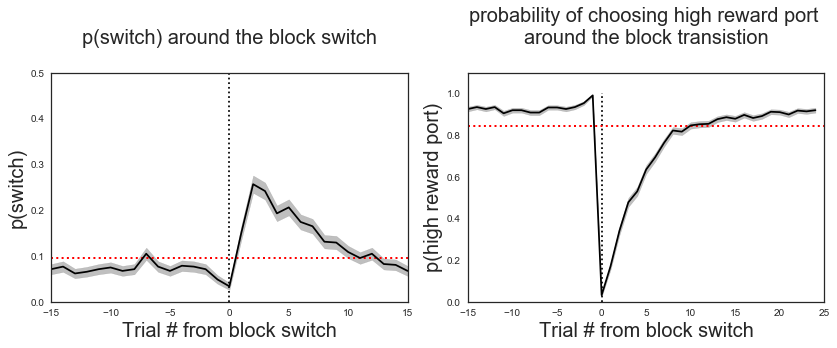

In [63]:
u = paraswitch.mean(axis=0)
s = paraswitch.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the block switch',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.5)

plt.subplot(122)
u = paraswitch_port.mean(axis=0)
s = paraswitch_port.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(high reward port)',fontsize=20)
plt.title('probability of choosing high reward port \naround the block transistion',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L+10)
plt.ylim(0,1.1)

plt.tight_layout()

## look at individual mice, smarter

In [64]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_PV30 = data[data['Mouse ID'] == 'PV30']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']


In [65]:
mice = [data_SOM45, data_SOM44, data_PV30, data_SOM41, data_SOM42]

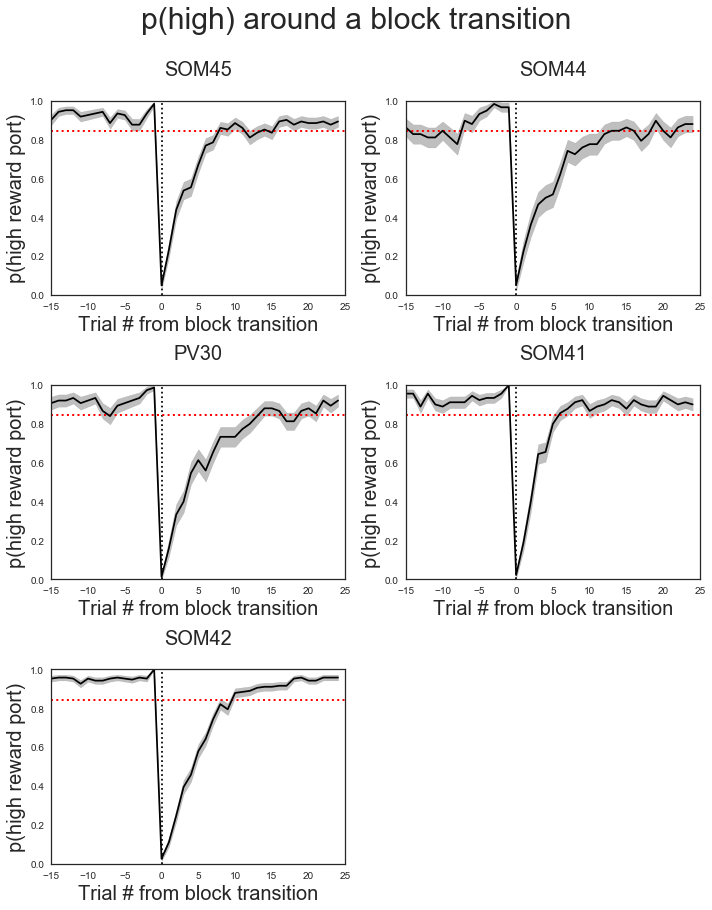

In [66]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(high) around a block transition',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_points = mouse[mouse['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for j,point in enumerate(switch_points):

        paraswitch[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[j,:] = data.iloc[point-L:point+L+10]['Higher p port'] 
        
    plt.subplot(3,2,i+1)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
    plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block transition',fontsize=20)
    plt.ylabel('p(high reward port)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0], fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L+10)
    plt.ylim(0,1)
        
plt.tight_layout()

In [67]:
data_PV30.shape, data_SOM42.shape, data_SOM41.shape, data_SOM44.shape, data_SOM45.shape

((5065, 53), (12407, 53), (6151, 53), (4243, 53), (8454, 53))

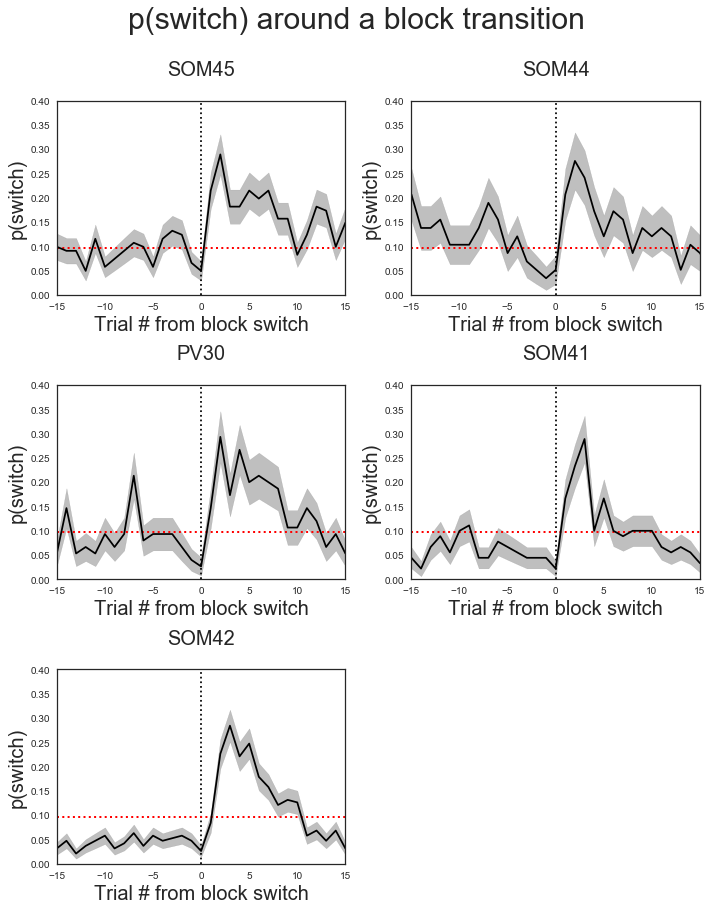

In [68]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(switch) around a block transition',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_points = mouse[mouse['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for j,point in enumerate(switch_points):

        paraswitch[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[j,:] = data.iloc[point-L:point+L+10]['Switch'] 
        
    plt.subplot(3,2,i+1)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
    plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block switch',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0],fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L)
    plt.ylim(0,0.4)
        
plt.tight_layout()


## Looking at p(switch) after rewarded or nonrewarded trials

In [74]:
switch_points = data[data['Block Trial'] == 0 ].index.values
switch_points

array([ 52, 122, 189, 255, 313, 374,  53, 112, 171, 230, 293, 352,  48,
       118, 179, 240, 304, 364, 429, 494, 558, 615,  49, 117, 208, 268,
       344, 410, 474,  46, 136, 209,  50, 111, 170, 231, 288, 346, 400,
       463, 524, 582,  59, 118,  49, 120, 183, 244, 304, 359, 418, 491,
        51, 133, 192,  55, 121, 191, 247, 315, 378, 436, 494, 555,  54,
       127,  68, 138, 220,  54, 122, 188, 243, 315, 371, 436, 492, 553,
        63, 133,  49, 120, 185, 260, 317, 394, 451,  65, 130, 206, 270,
        52, 121, 183, 248, 315, 384,  54, 114, 177, 242, 313, 371, 432,
       497, 563,  48, 112, 168,  55, 118, 187, 252, 314, 369, 440, 500,
        63, 128, 194, 264, 334,  66, 121, 191, 244, 327, 382,  53, 115,
       178, 240, 300, 361, 418, 485, 543,  53, 118,  49, 120, 185, 252,
       313, 377, 430, 493,  72, 127, 199, 264, 327, 385,  51, 126, 186,
       259, 311,  45, 107, 173, 234, 295, 366, 427, 495,  44, 121, 196,
        55, 120, 187, 245, 309, 369, 435, 489,  55, 121, 180, 24

little note on the for loop below. 

took me little while because I had the order of the else-if statements wrong. 

when block_trial == 0 needs to come BEFORE whether the block trial incremented by 1 or not (which is my hokey way of detecting when a new session started where block_trial does not equal 0. 

I suppose a better way would be to detect when the block trial is 11 AND the previous block trial != 10. that would work. okay. switched it to that now. 

In [75]:
block_reward = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    trial = data.iloc[i]
    
    #lets deal with weird cases first:
    #1) the first row
    if(i == 0):
        block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
    
    #3) the first trial of a new block
    elif (trial['Block Trial'] == 0):
        block_reward[i] = 0
    
    #2) the first trial of a new session
    elif (((trial['Block Trial'] - trial_prev['Block Trial']) != 1) and (trial['Block Trial'] == 11)):
        block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
    else:
        block_reward[i] = block_reward[i-1] + trial['Reward']
    
    trial_prev = trial

In [76]:
reward_switches = np.zeros(np.unique(block_reward).shape[0])
reward_switches_afterR = np.zeros(np.unique(block_reward).shape[0])
reward_switches_afterNoR = np.zeros(np.unique(block_reward).shape[0])
for i,r_block in enumerate(np.unique(block_reward)):
    reward_switches[i] = data[block_reward == r_block]['Switch'].mean()
    reward_switches_afterR[i] = data[((block_reward == r_block) & (data['1_Reward']==1))]['Switch'].mean()
    reward_switches_afterNoR[i] = data[((block_reward == r_block) & (data['1_Reward']==0))]['Switch'].mean()

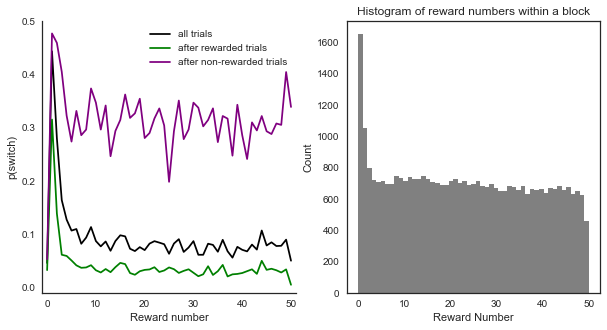

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.unique(block_reward),reward_switches,color='black',label='all trials')
plt.plot(np.unique(block_reward),reward_switches_afterR,color='green',label='after rewarded trials')
plt.plot(np.unique(block_reward),reward_switches_afterNoR,color='purple',label='after non-rewarded trials')
plt.xlabel('Reward number')
plt.ylabel('p(switch)')
plt.legend(loc='upper right')
plt.xlim(-1,51)
plt.ylim(-0.01,0.5)
sns.despine()

plt.subplot(122)
plt.hist(block_reward,bins=51,color='grey')
plt.title('Histogram of reward numbers within a block')
plt.xlabel('Reward Number')
plt.ylabel('Count')

In [75]:
data

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward
0,SOM42,06142017_SOM42,11,2,-1,0,1,5.106,1.455,0,...,0.488,0,0,4.024,0.355,5.106,0,0,1,1
1,SOM42,06142017_SOM42,12,3,1,0,1,2.365,0.604,0,...,0.355,0,1,2.052,0.426,2.365,0,0,1,1
2,SOM42,06142017_SOM42,13,4,2,0,1,2.245,0.962,0,...,0.426,0,1,3.879,0.411,2.245,0,0,1,1
3,SOM42,06142017_SOM42,14,5,3,0,1,3.004,0.738,0,...,0.411,0,1,3.514,0.414,3.004,0,0,1,1
4,SOM42,06142017_SOM42,15,6,4,0,1,2.813,0.604,0,...,0.414,0,1,2.229,0.394,2.813,0,0,1,1
5,SOM42,06142017_SOM42,16,7,5,0,1,2.992,0.444,1,...,0.394,0,1,3.317,0.418,2.992,0,0,1,1
6,SOM42,06142017_SOM42,17,8,6,1,0,1.859,0.598,1,...,0.418,0,1,4.422,0.405,1.859,0,0,1,1
7,SOM42,06142017_SOM42,18,9,7,1,0,1.515,0.595,0,...,0.405,0,1,5.116,0.523,1.515,0,0,1,1
8,SOM42,06142017_SOM42,19,10,8,0,1,1.303,0.488,0,...,0.523,0,1,4.748,0.415,1.303,0,0,1,1
9,SOM42,06142017_SOM42,20,11,9,0,0,4.024,0.355,0,...,0.415,0,1,3.984,0.463,4.024,0,0,1,1
